In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_excel('cleaned_final_train_data.xlsx')
df.head()

,Unnamed: 0,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,...,Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price,Industry-Energy,Industry-Healthcare,Industry-Information Tech,Industry-Materials,Industry-Real Estate
0,0,AA1,NYSE,Real Estate,0.725531,0.229099,0.323865,0.226784,0.059967,0.606242,...,0.845528,0.013351,0.472868,0.962343,156.987852,0,0,0,0,1
1,1,AA4,BSE,Materials,0.857979,0.685225,0.736747,0.758914,0.412653,0.576230,...,0.700813,1.000000,0.860465,0.585774,1121.787632,0,0,0,1,0
2,2,AA6,BSE,Materials,0.268967,0.685225,0.106321,0.765365,0.955812,0.965186,...,0.559350,1.000000,0.891473,0.576360,158.687016,0,0,0,1,0
3,3,AA7,NYSE,Healthcare,0.658271,0.229099,0.672234,0.148172,0.351590,0.704682,...,0.302439,0.013351,0.581395,0.899582,209.645870,0,1,0,0,0
4,4,AA9,NSE,Materials,0.985081,0.202257,0.315063,0.798020,0.067529,0.326531,...,0.868293,1.000000,0.945736,0.675732,514.240811,0,0,0,1,0


In [3]:
df.drop(['Unnamed: 0','Industry'],axis = 1, inplace = True)

In [4]:
dummy_variable_1 = pd.get_dummies(df["Index"])
dummy_variable_1.head(10)

,BSE,JSE,NSE,NYSE,S&P 500
0,0,0,0,1,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
5,0,0,0,0,1
6,1,0,0,0,0
7,0,1,0,0,0
8,0,0,0,0,1
9,0,0,0,1,0


In [5]:
df = pd.concat([df, dummy_variable_1], axis=1)
df.head(10)

,Stock Index,Index,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,...,Industry-Energy,Industry-Healthcare,Industry-Information Tech,Industry-Materials,Industry-Real Estate,BSE,JSE,NSE,NYSE,S&P 500
0,AA1,NYSE,0.725531,0.229099,0.323865,0.226784,0.059967,0.606242,-0.551282,0.845528,...,0,0,0,0,1,0,0,0,1,0
1,AA4,BSE,0.857979,0.685225,0.736747,0.758914,0.412653,0.576230,0.038462,0.700813,...,0,0,0,1,0,1,0,0,0,0
2,AA6,BSE,0.268967,0.685225,0.106321,0.765365,0.955812,0.965186,0.038462,0.559350,...,0,0,0,1,0,1,0,0,0,0
3,AA7,NYSE,0.658271,0.229099,0.672234,0.148172,0.351590,0.704682,1.000000,0.302439,...,0,1,0,0,0,0,0,0,1,0
4,AA9,NSE,0.985081,0.202257,0.315063,0.798020,0.067529,0.326531,0.038462,0.868293,...,0,0,0,1,0,0,0,1,0,0
5,AA21,S&P 500,0.951472,0.060143,0.230346,0.567235,0.153556,0.387755,0.294872,0.723577,...,0,0,1,0,0,0,0,0,0,1
6,AA22,BSE,0.323608,0.685225,0.312963,0.872931,0.847639,0.496999,1.000000,0.367480,...,0,1,0,0,0,1,0,0,0,0
7,AA23,JSE,0.415609,1.000000,0.432787,0.536630,0.441875,0.791116,1.000000,0.482927,...,0,1,0,0,0,0,1,0,0,0
8,AA24,S&P 500,0.434527,0.060143,0.499800,0.193529,0.804406,0.424970,-0.551282,0.747967,...,0,0,0,0,1,0,0,0,0,1
9,AA25,NYSE,0.536961,0.229099,0.682136,0.875131,0.106015,0.470588,-0.551282,0.956098,...,0,0,0,0,1,0,0,0,1,0


In [6]:
df.drop(['Stock Index','Index'], axis = 1, inplace = True)

In [7]:
df.head()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,...,Industry-Energy,Industry-Healthcare,Industry-Information Tech,Industry-Materials,Industry-Real Estate,BSE,JSE,NSE,NYSE,S&P 500
0,0.725531,0.229099,0.323865,0.226784,0.059967,0.606242,-0.551282,0.845528,0.013351,0.472868,...,0,0,0,0,1,0,0,0,1,0
1,0.857979,0.685225,0.736747,0.758914,0.412653,0.576230,0.038462,0.700813,1.000000,0.860465,...,0,0,0,1,0,1,0,0,0,0
2,0.268967,0.685225,0.106321,0.765365,0.955812,0.965186,0.038462,0.559350,1.000000,0.891473,...,0,0,0,1,0,1,0,0,0,0
3,0.658271,0.229099,0.672234,0.148172,0.351590,0.704682,1.000000,0.302439,0.013351,0.581395,...,0,1,0,0,0,0,0,0,1,0
4,0.985081,0.202257,0.315063,0.798020,0.067529,0.326531,0.038462,0.868293,1.000000,0.945736,...,0,0,0,1,0,0,0,1,0,0


In [8]:
y_data = df['Stock Price']
y_data.head()

0     156.987852
1    1121.787632
2     158.687016
3     209.645870
4     514.240811
Name: Stock Price, dtype: float64

In [9]:
x_data = df.drop(['Stock Price'], axis =1)
x_data.head()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,...,Industry-Energy,Industry-Healthcare,Industry-Information Tech,Industry-Materials,Industry-Real Estate,BSE,JSE,NSE,NYSE,S&P 500
0,0.725531,0.229099,0.323865,0.226784,0.059967,0.606242,-0.551282,0.845528,0.013351,0.472868,...,0,0,0,0,1,0,0,0,1,0
1,0.857979,0.685225,0.736747,0.758914,0.412653,0.576230,0.038462,0.700813,1.000000,0.860465,...,0,0,0,1,0,1,0,0,0,0
2,0.268967,0.685225,0.106321,0.765365,0.955812,0.965186,0.038462,0.559350,1.000000,0.891473,...,0,0,0,1,0,1,0,0,0,0
3,0.658271,0.229099,0.672234,0.148172,0.351590,0.704682,1.000000,0.302439,0.013351,0.581395,...,0,1,0,0,0,0,0,0,1,0
4,0.985081,0.202257,0.315063,0.798020,0.067529,0.326531,0.038462,0.868293,1.000000,0.945736,...,0,0,0,1,0,0,0,1,0,0


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=5)

In [12]:
x_train.head()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,...,Industry-Energy,Industry-Healthcare,Industry-Information Tech,Industry-Materials,Industry-Real Estate,BSE,JSE,NSE,NYSE,S&P 500
1282,0.288694,1.000000,0.232947,0.302145,0.290917,0.881152,-0.551282,0.666667,0.236315,0.891473,...,0,0,0,0,1,0,1,0,0,0
167,0.585531,0.202257,0.719644,0.775366,0.692155,0.756303,-0.551282,0.582114,1.000000,0.542636,...,0,0,0,0,1,0,0,1,0,0
4754,0.075497,0.060143,0.645829,0.111767,0.686709,0.710684,-0.551282,0.969106,0.013351,0.798450,...,0,0,0,0,1,0,0,0,0,1
3854,0.297127,0.060143,0.302761,0.411462,0.143103,0.360144,1.000000,0.721951,0.013351,0.697674,...,0,1,0,0,0,0,0,0,0,1
6025,0.222563,1.000000,0.784057,0.971946,0.081377,0.969988,0.038462,0.892683,0.236315,0.550388,...,0,0,0,1,0,0,1,0,0,0


In [13]:
x_test.head()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,...,Industry-Energy,Industry-Healthcare,Industry-Information Tech,Industry-Materials,Industry-Real Estate,BSE,JSE,NSE,NYSE,S&P 500
3799,0.217051,0.685225,0.216143,0.734010,0.071338,0.771909,1.000000,0.414634,1.000000,0.953488,...,0,1,0,0,0,1,0,0,0,0
2458,0.993836,0.202257,0.252551,0.121818,0.309697,0.570228,0.141026,0.318699,1.000000,0.550388,...,1,0,0,0,0,0,0,1,0,0
1227,0.989619,0.202257,0.470294,0.369605,0.093561,0.662665,-0.551282,0.400000,1.000000,0.527132,...,0,0,0,0,1,0,0,1,0,0
5168,0.188601,0.202257,0.683337,0.842376,0.798281,0.572629,1.000000,0.839024,1.000000,0.945736,...,0,1,0,0,0,0,0,1,0,0
5454,0.080501,0.229099,0.695539,0.963945,0.278219,0.818727,-0.551282,0.456911,0.013351,0.534884,...,0,0,0,0,1,0,0,0,1,0


In [14]:
y_train.head()

1282     135.415875
167     1112.503198
4754     142.407604
3854     241.765611
6025    1504.806659
Name: Stock Price, dtype: float64

In [15]:
y_test.head()

3799     303.463073
2458      77.232540
1227     357.890281
5168    1134.702448
5454    1321.643899
Name: Stock Price, dtype: float64

In [16]:
def CalcRMSE(output2,target2):
    error = output2-target2
    error_sq = error**2
    Sum_error_sq = np.sum(error_sq)
    variance = Sum_error_sq/len(output2)
    RMSE = variance**0.5
    return RMSE

The R-square is:  0.9999427690880177
The mean square error of price and predicted value is:  10.174361661297592
RMSE:  3.189727521481669


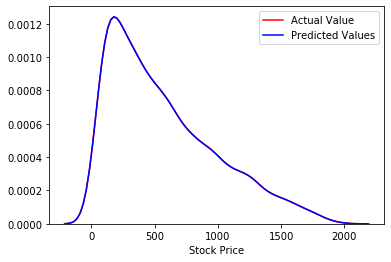

In [18]:
lm = RandomForestRegressor(n_estimators = 100, random_state = 0)

x_train_new = x_train[['NAV', 'P/E Ratio']]

lm.fit(x_train_new,y_train)

Yhat=lm.predict(x_train_new)

print('The R-square is: ', lm.score(x_train_new, y_train))
mse = mean_squared_error(y_train, Yhat)
print('The mean square error of price and predicted value is: ', mse)
print("RMSE: ",CalcRMSE(y_train, Yhat))

ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

The R-square is:  0.9996348463581377
The mean square error of price and predicted value is:  68.97429704843422
RMSE:  8.30507658293614


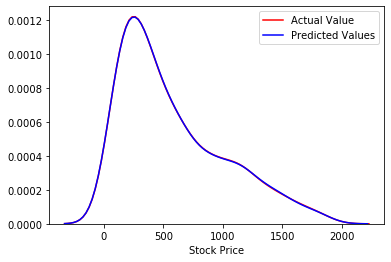

In [19]:
x_test_new = x_test[['NAV','P/E Ratio']]

Yhat=lm.predict(x_test_new)


print('The R-square is: ', lm.score(x_test_new, y_test))
mse = mean_squared_error(y_test, Yhat)
print('The mean square error of price and predicted value is: ', mse)
print("RMSE: ",CalcRMSE(y_test, Yhat))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

In [23]:
import pickle
filename = 'RFModel.sav'
pickle.dump(lm, open(filename, 'wb'))

In [24]:
model = pickle.load(open(filename, 'rb'))

The R-square is:  0.9996348463581377
The mean square error of price and predicted value is:  68.97429704843422
RMSE:  8.30507658293614


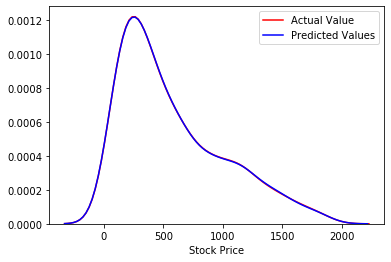

In [25]:
x_test_new = x_test[['NAV','P/E Ratio']]

Yhat=model.predict(x_test_new)


print('The R-square is: ', model.score(x_test_new, y_test))
mse = mean_squared_error(y_test, Yhat)
print('The mean square error of price and predicted value is: ', mse)
print("RMSE: ",CalcRMSE(y_test, Yhat))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

# Testing

## Preprocessing and Cleaning the test dataset

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [140]:
raw_data = pd.read_excel('Test_dataset.xlsx',sheet_name = 0)

In [141]:
raw_data.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18


In [142]:
raw_data1 = raw_data.drop(['Stock Index','Index','Industry'],axis =1)

In [143]:
raw_data1

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
4,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18
...,...,...,...,...,...,...,...,...,...,...,...
3326,121.58,11270.15,11.93,122.28,14034395.0,2.87,0.11,0.0602,74.9,0.86,7.87
3327,692.25,38182.08,NaN,NaN,NaN,NaN,0.11,0.0388,74.9,0.64,0.95
3328,911.37,11270.15,NaN,NaN,NaN,NaN,0.11,0.0166,74.9,0.67,7.54
3329,479.38,38182.08,20.52,176.89,3069831.0,3.60,0.78,0.0495,74.9,0.79,4.01


In [144]:
raw_data2 = raw_data[['NAV','P/E Ratio']]
raw_data2

,NAV,P/E Ratio
0,44.59,185.09
1,74.20,34.01
2,88.41,177.40
3,79.36,105.44
4,19.90,139.40
...,...,...
3326,11.93,122.28
3327,NaN,NaN
3328,NaN,NaN
3329,20.52,176.89


In [145]:
missing_data = raw_data2.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

NAV
False    3056
True      275
Name: NAV, dtype: int64

P/E Ratio
False    3039
True      292
Name: P/E Ratio, dtype: int64



In [146]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=20, random_state=0)
imp.fit(raw_data1)
raw_data3 = imp.transform(raw_data1)

In [147]:
raw_data3

array([[5.33000000e+01, 1.12701500e+04, 4.45900000e+01, ...,
        7.49000000e+01, 8.00000000e-01, 4.66000000e+00],
       [7.49340000e+02, 5.57220000e+04, 7.42000000e+01, ...,
        1.77000000e+01, 8.60000000e-01, 6.11000000e+00],
       [5.67750000e+02, 3.35128000e+03, 8.84100000e+01, ...,
        1.00000000e+00, 9.30000000e-01, 4.99000000e+00],
       ...,
       [9.11370000e+02, 1.12701500e+04, 5.39492968e+01, ...,
        7.49000000e+01, 6.70000000e-01, 7.54000000e+00],
       [4.79380000e+02, 3.81820800e+04, 2.05200000e+01, ...,
        7.49000000e+01, 7.90000000e-01, 4.01000000e+00],
       [4.31430000e+02, 1.27658400e+04, 7.64600000e+01, ...,
        1.00000000e+00, 7.40000000e-01, 4.98000000e+00]])

In [148]:
raw_data1.columns

Index(['VWAP', 'General Index', 'NAV', 'P/E Ratio', 'Volumes Traded',
       'Inventory Turnover', 'Covid Impact (Beta)', 'Tracking Error',
       'Dollar Exchange Rate', 'Put-Call Ratio', 'P/B Ratio'],
      dtype='object')

In [149]:
raw_data4 = pd.DataFrame(data=raw_data3, columns=raw_data1.columns)

In [150]:
raw_data4

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,53.30,11270.15,44.590000,185.090000,1.206786e+07,2.780000,0.03,0.0330,74.9,0.800000,4.66
1,749.34,55722.00,74.200000,34.010000,6.172474e+06,6.780000,0.11,0.0464,17.7,0.860000,6.11
2,567.75,3351.28,88.410000,177.400000,1.747249e+07,4.360000,0.23,0.0401,1.0,0.930000,4.99
3,646.78,11270.15,79.360000,105.440000,1.555316e+07,2.770000,0.78,0.0187,74.9,1.090000,1.26
4,380.33,12765.84,19.900000,139.400000,1.252578e+07,5.930000,0.03,0.0261,1.0,0.942425,6.18
...,...,...,...,...,...,...,...,...,...,...,...
3326,121.58,11270.15,11.930000,122.280000,1.403440e+07,2.870000,0.11,0.0602,74.9,0.860000,7.87
3327,692.25,38182.08,54.572158,103.933820,1.018309e+07,5.445942,0.11,0.0388,74.9,0.640000,0.95
3328,911.37,11270.15,53.949297,105.695168,1.018308e+07,5.509677,0.11,0.0166,74.9,0.670000,7.54
3329,479.38,38182.08,20.520000,176.890000,3.069831e+06,3.600000,0.78,0.0495,74.9,0.790000,4.01


In [151]:
raw_data4.to_excel('testing_data_wo_et.xlsx')

In [152]:
raw_data2[['NAV','P/E Ratio']] = raw_data4[['NAV','P/E Ratio']]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [153]:
raw_data2

,NAV,P/E Ratio
0,44.590000,185.090000
1,74.200000,34.010000
2,88.410000,177.400000
3,79.360000,105.440000
4,19.900000,139.400000
...,...,...
3326,11.930000,122.280000
3327,54.572158,103.933820
3328,53.949297,105.695168
3329,20.520000,176.890000


In [154]:
raw_data2.to_excel('test_data_to_predict.xlsx')

In [155]:
missing_data = raw_data2.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

NAV
False    3331
Name: NAV, dtype: int64

P/E Ratio
False    3331
Name: P/E Ratio, dtype: int64



In [156]:
raw_data2['NAV'] = raw_data2['NAV']/99.98

raw_data2['P/E Ratio'] = raw_data2['P/E Ratio']/199.97

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [157]:
raw_data2.to_excel('test_data_to_predict.xlsx')

In [158]:
x_test_new = raw_data2[['NAV','P/E Ratio']]
Yhat=model.predict(x_test_new)

In [159]:
raw_data2['Stock Price'] = Yhat

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [160]:
raw_data2.to_excel('Final_test_output.xlsx')

In [161]:
final_out = pd.DataFrame()

In [162]:
final_out['Stock Index'] = raw_data['Stock Index']

In [163]:
final_out

,Stock Index
0,AC3235
1,AC3236
2,AC3237
3,AC3238
4,AC3239
...,...
3326,AD2734
3327,AD2735
3328,AD2736
3329,AD2737


In [164]:
final_out['Stock Price'] = raw_data2['Stock Price']

In [165]:
final_out

,Stock Index,Stock Price
0,AC3235,815.807537
1,AC3236,249.416067
2,AC3237,1561.066599
3,AC3238,829.946889
4,AC3239,268.538355
...,...,...
3326,AD2734,139.204947
3327,AD2735,566.966836
3328,AD2736,571.109004
3329,AD2737,354.589865


In [166]:
final_out.to_excel('Output1.xlsx')